In [1]:
import PyPDF2
import pandas as pd

pdfFileObj = open('ComputingScienceSummaries.pdf', 'rb')
pdfReader = PyPDF2.PdfReader(pdfFileObj)
  
n_pages = len(pdfReader.pages)
text = ''

for n in range(n_pages):
    pageObj = pdfReader.pages[n]
    text += pageObj.extract_text()
  
pdfFileObj.close()

In [110]:
courses = {}
use_next_line = False
course_type = 'CSE'

for i, line in enumerate(text.splitlines()):
    if line.strip().startswith(course_type):
        course = line.replace('  ', ' ').strip()
    elif 'Prerequisite' in line:
        preq = line.split(': ')[1].strip().replace(' ', '')
        if 'None' in preq:
            preq = ''
        courses[course] = [preq]
    elif use_next_line:
        use_next_line = False
        preq2 = line.split(': ')[0].strip().replace(' ', '')
        if len(preq2) != 0: # in case there is no prereq on this line
            preq = preq + ',' + preq2
        courses[course] = [preq]
        
        

    if 'Prerequisites' in line:
        print(i, course, preq, '---', line)
        use_next_line = True
df = pd.DataFrame.from_dict(courses, orient='index', columns=['Prerequisites']).reset_index()
df.columns = ['Course', 'Prerequisites']
df

54 CSE2010: COMPUTER SCIENCE 2 CSE1010 ---  Prerequisites:  CSE1010: Computer Science 1 
82 CSE2140: SECOND LANGUAGE PROGRAMMING 1 CSE2110 ---  Prerequisites:  CSE2110: Procedural Programming 1 o r 
89 CSE2210: CLIENT -SIDE SCRIPTING 3 CSE1220 ---  Prerequisites:  CSE1220: Client -side Scripting 2  
97 CSE2240: ROBOTICS PROGRAMMING 2 CSE1240 ---  Prerequisites:  CSE1240: Robotics Programming 1  
125 CSE3010: COMPUTER SCIENCE 3 CSE2010 ---  Prerequisites:  CSE2010: Computer Science 2  
134 CSE3020: COMPUTER SCIENCE 4 CSE3010 ---  Prerequisites:  CSE3010: Computer Science 3  
141 CSE3110: ITERATIVE ALGORITHM 1 CSE2120 ---  Prerequisites:  CSE2120: Data Structures 1  
166 CSE3210: SERVER -SIDE SCRIPTING 1 CSE2210 ---  Prerequisites:  CSE2210: Client -side Scripting 3  
175 CSE2120: Data Structures 1 CSE2240 ---  Prerequisites : CSE2240: Robotics Programming 2  
182 CSE3310: RECURSIVE ALGORITHMS 1 CSE3110 ---  Prerequisites:  CSE3110: Iterative Algorithm 1 


,Course,Prerequisites
0,CSE1010: COMPUTER SCIENCE 1,
1,CSE1110: STRUCTURED PROGRAMMING 1,
2,CSE1120: STRUCTURED PROGRAMMING 2,CSE1110
3,CSE1210: CLIENT -SIDE SCRIPTING 1,
4,CSE1220: CLIENT -SIDE SCRIPTING 2,
...,...,...
28,CSE3320: DYNAMIC DATA STRUCTURES 1,CSE3310
29,CSE3340: DYNAMIC DATA STRUCTURES 3,CSE3330
30,CSE3910: CSE PROJECT D,
31,CSE3920: CSE PROJECT E,


In [96]:
df[df['Prerequisites'].str.contains('CSE')]

,Course,Prerequisites
2,CSE1120: STRUCTURED PROGRAMMING 2,CSE1110
5,CSE1240: ROBOTICS PROGRAMMING 1,CSE1110
7,CSE2010: COMPUTER SCIENCE 2,CSE1010
9,CSE2110: PROCEDURAL PROGRAMMING 1,CSE1120
10,CSE2120: DATA STRUCTURES 1,CSE2110
...,...,...
25,CSE2120: Data Structures 1,CSE2240
26,CSE3310: RECURSIVE ALGORITHMS 1,CSE3110
27,CSE3120: Object -oriented Programming 1,CSE3110
28,CSE3320: DYNAMIC DATA STRUCTURES 1,CSE3310


In [103]:
df[df['Course'].str[3]=='1']

,Course,Prerequisites
0,CSE1010: COMPUTER SCIENCE 1,
1,CSE1110: STRUCTURED PROGRAMMING 1,
2,CSE1120: STRUCTURED PROGRAMMING 2,CSE1110
3,CSE1210: CLIENT -SIDE SCRIPTING 1,
4,CSE1220: CLIENT -SIDE SCRIPTING 2,
5,CSE1240: ROBOTICS PROGRAMMING 1,CSE1110
6,CSE1910: CSE PROJECT A,
8,CSE1120: Structured Programming 2,


In [97]:
df.to_csv('courses.csv', index=False)

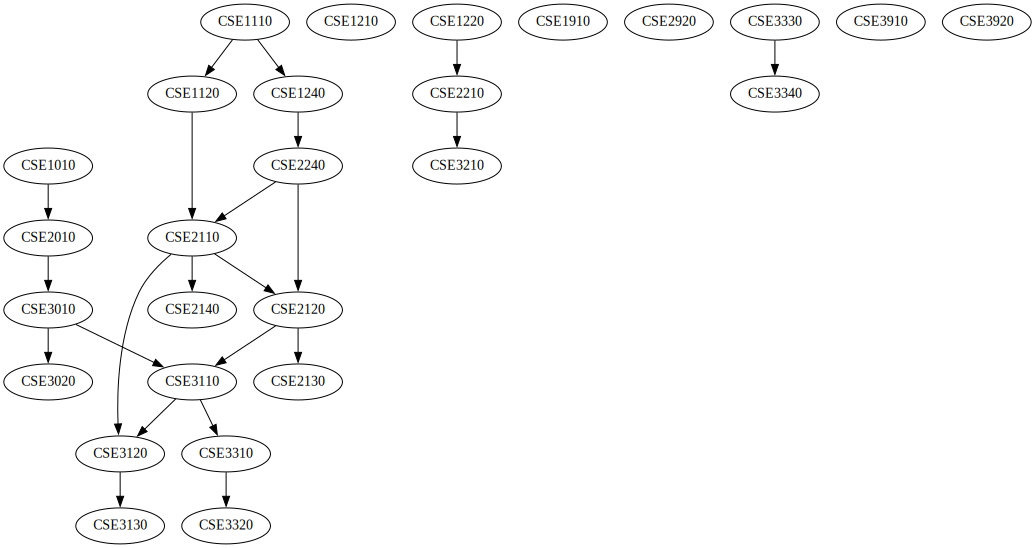

In [100]:
import graphviz
dot = graphviz.Digraph()

for row in df.itertuples():
    course_number = row.Course.split(':')[0]
    if '50' not in course_number:
        dot.node(course_number)
        if row.Prerequisites != '':
            for preq in row.Prerequisites.split(','):
                #print(course_number, preq)
                dot.edge(preq, course_number)

dot